In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.common.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

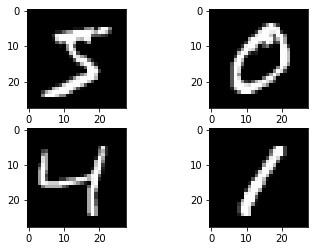

In [3]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [0]:
seed = 7
np.random.seed(seed)

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
num_classes = y_test.shape[1]

In [0]:
def larger_model():
  model = Sequential()
  model.add(Convolution2D(30, (5, 5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [9]:
model = larger_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Large CNN Error: %.2f%%' % (100-scores[1]*100))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 4s - loss: 0.3804 - acc: 0.8837 - val_loss: 0.0821 - val_acc: 0.9743
Epoch 2/10
 - 2s - loss: 0.1012 - acc: 0.9690 - val_loss: 0.0616 - val_acc: 0.9785
Epoch 3/10
 - 2s - loss: 0.0728 - acc: 0.9778 - val_loss: 0.0407 - val_acc: 0.9871
Epoch 4/10
 - 2s - loss: 0.0585 - acc: 0.9823 - val_loss: 0.0352 - val_acc: 0.9888
Epoch 5/10
 - 2s - loss: 0.0486 - acc: 0.9840 - val_loss: 0.0331 - val_acc: 0.9895
Epoch 6/10
 - 2s - loss: 0.0435 - acc: 0.9863 - val_loss: 0.0279 - val_acc: 0.9906
Epoch 7/10
 - 2s - loss: 0.0373 - acc: 0.9885 - val_loss: 0.0333 - val_acc: 0.9887
Epoch 8/10
 - 2s - loss: 0.0353 - acc: 0.9886 - val_loss: 0.0265 - val_acc: 0.9912
Epoch 9/10
 - 2s - loss: 0.0297 - acc: 0.9906 - val_loss: 0.0242 - val_acc: 0.9915
Epoch 10/10
 - 2s - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0296 - val_acc: 0.9903
Large CNN Error: 0.97%
